In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Load the dataset
data = pd.read_csv('MaternalHealth.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values in the target column 'RiskLevel' by dropping rows with missing target values
data = data.dropna(subset=['RiskLevel'])

# Encode categorical target variable
y = data['RiskLevel'].map({'low risk': 0, 'medium risk': 1, 'high risk': 2})

# Drop rows where target variable couldn't be mapped (if there are unexpected categories)
data = data[~y.isna()]
y = y.dropna()

# Split the data into features and target
X = data.drop('RiskLevel', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Logistic Regression Accuracy: 0.8824
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        63
         2.0       1.00      0.78      0.88        73

    accuracy                           0.88       136
   macro avg       0.90      0.89      0.88       136
weighted avg       0.91      0.88      0.88       136

Decision Tree Accuracy: 0.9706
              precision    recall  f1-score   support

In [5]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Save the trained Decision Tree model for deployment
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')

# Save the scaler for deployment
joblib.dump(scaler, 'scaler.pkl')

Decision Tree Accuracy: 0.9485
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        63
         2.0       0.99      0.92      0.95        73

    accuracy                           0.95       136
   macro avg       0.95      0.95      0.95       136
weighted avg       0.95      0.95      0.95       136



['scaler.pkl']

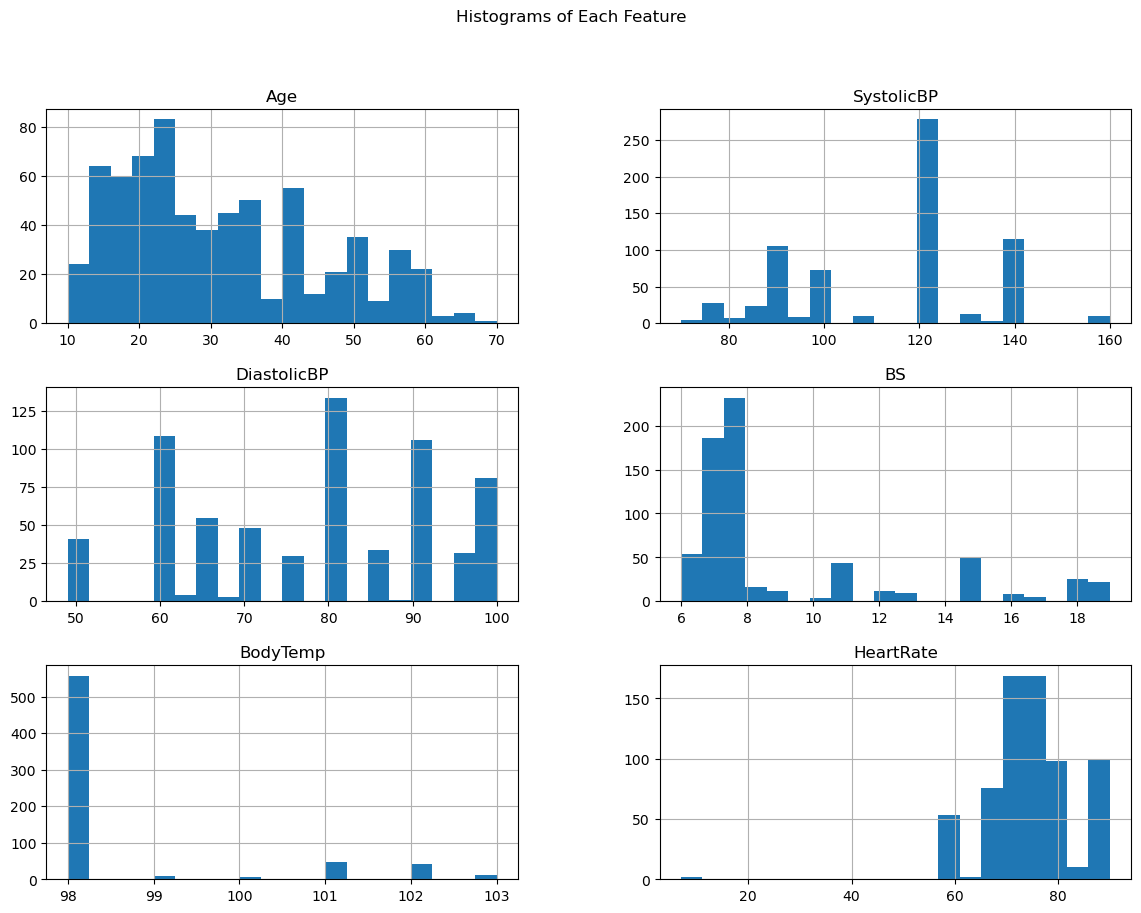

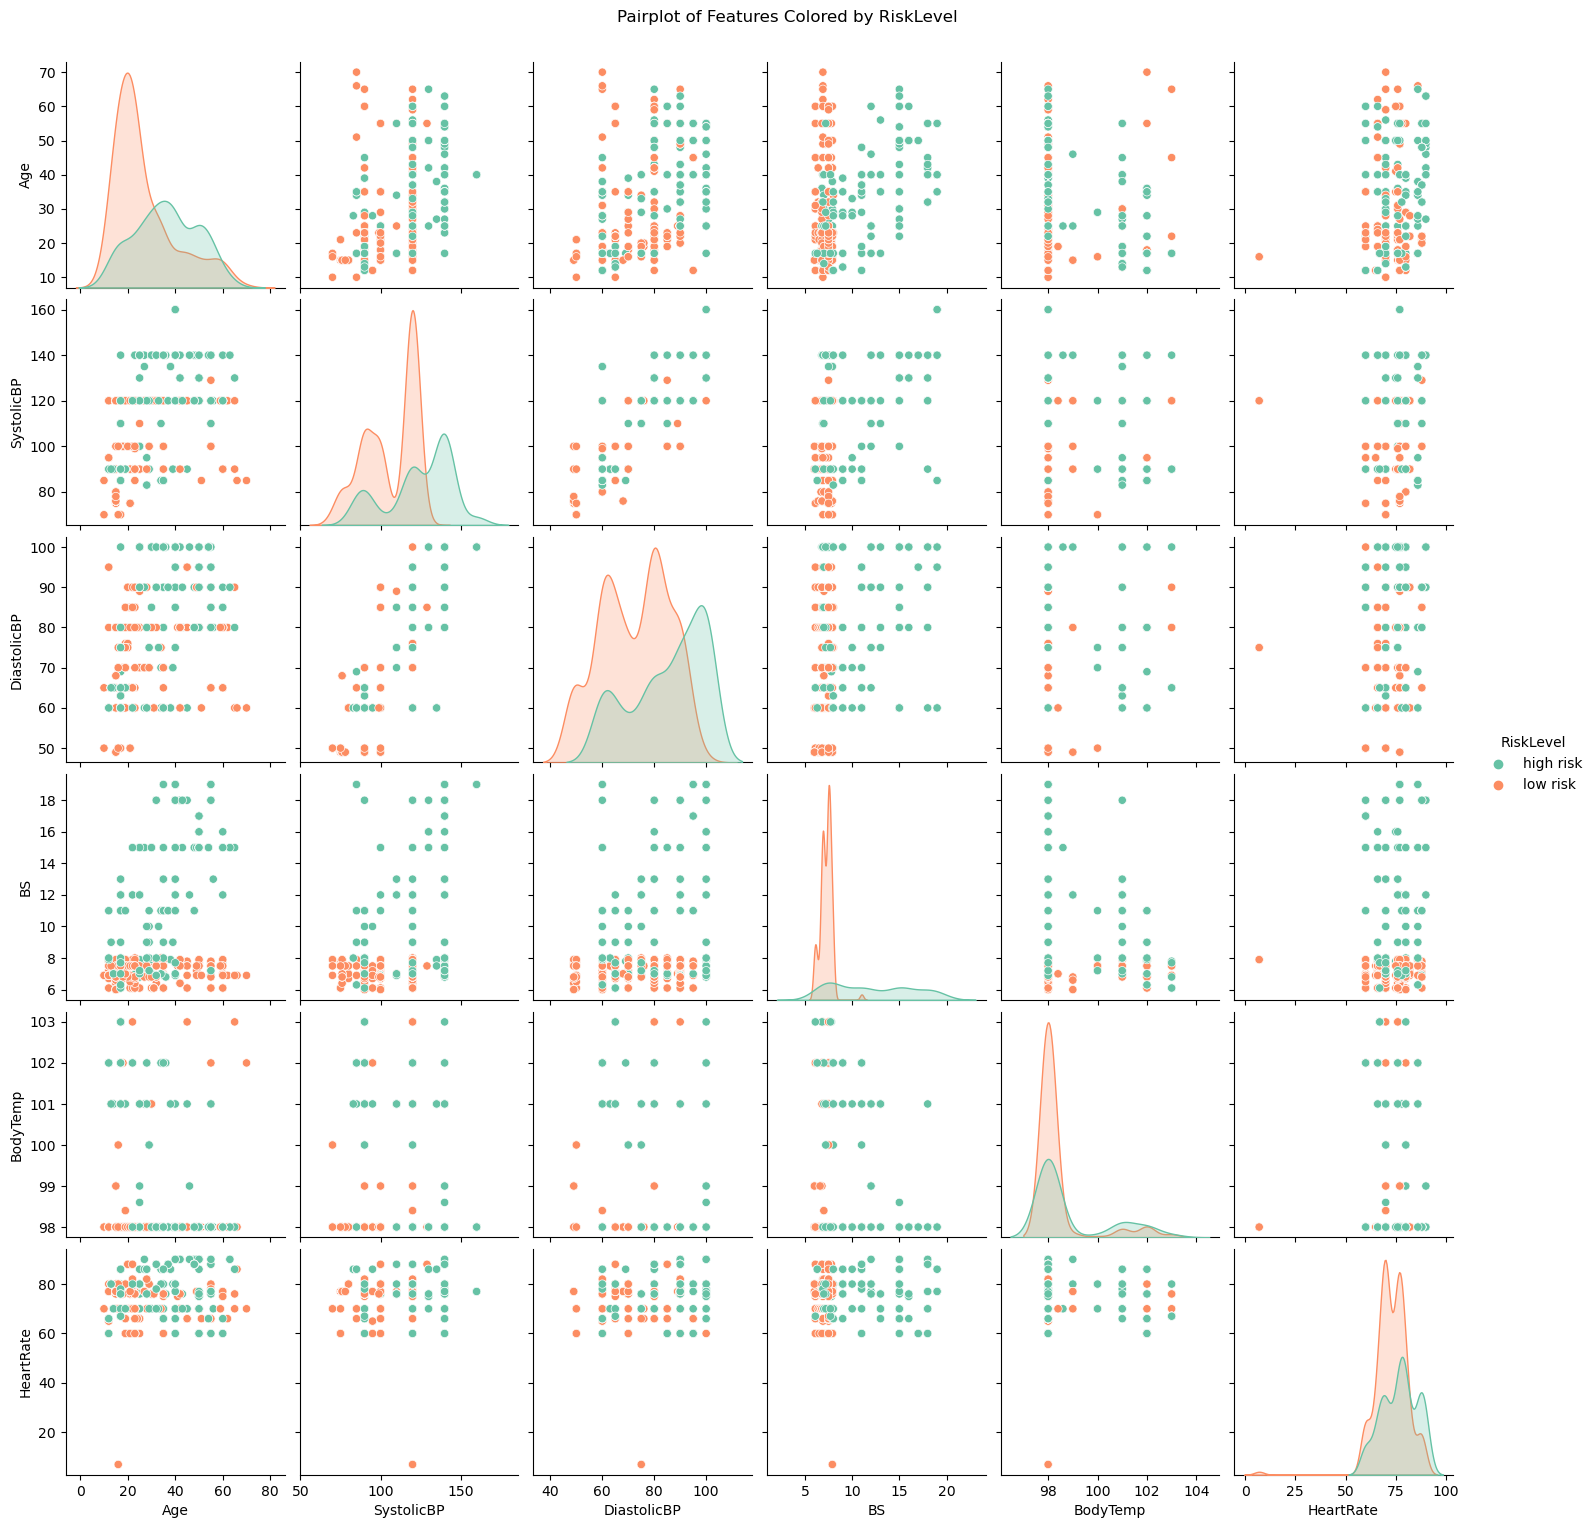

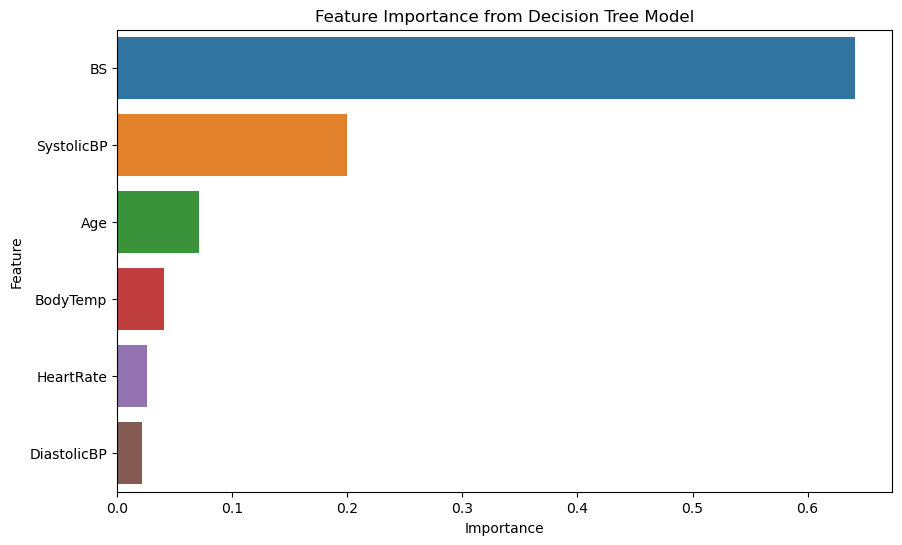

NameError: name 'confusion_matrix' is not defined

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Each Feature')
plt.show()

# 2. Pairplot of features colored by RiskLevel
sns.pairplot(data, hue='RiskLevel', palette='Set2')
plt.suptitle('Pairplot of Features Colored by RiskLevel', y=1.02)
plt.show()

# 3. Feature importance from the Decision Tree model
feature_importances = decision_tree_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Decision Tree Model')
plt.show()

# 4. Confusion matrix for model performance
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Low Risk', 'Medium Risk', 'High Risk'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

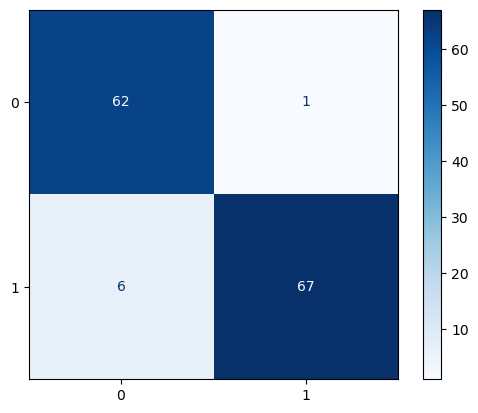

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Low Risk', 'Medium Risk', 'High Risk'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()